<h1> Seattle AirBnB Open Data

<h2> by Arushi Chawla

> This data has been taken from Kaggle and it gives us a sneak peek into the Airbnb activity in Seattle. In this project, we will look through this data and try to identify .........
- Year price trend
- Availability impacting the price of same listing 
- high prices house features, high review house features?


In [30]:
# import packages and set  plot to be embedded
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# To display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h2> Data Gathering

> In this section, we will be reading 3 .csv files that have been downloaded to our local machine from https://www.kaggle.com/airbnb/seattle/data#calendar.csv 

In [10]:
# Read all data files
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

In [50]:
#Look through the different data files

In [11]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
summary                             3641 non-null object
name                                3818 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview
notes
transit
thumbnail_url
medium_url
picture_url
xl_picture_url
host_url
host_about
host_thumbnail_url
host_picture_url
street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, square_feet, calendar_updated
license

rename market: city
price	weekly_price	monthly_price

In [31]:
#cols = listing.columns.tolist()
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [87]:
listings.experiences_offered.unique()
listings.host_response_time.unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [13]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


<h2> Data Cleaning

 > Check for data anomalies including but not limiting to nulls, appropriate column data type etc.

In [351]:
# Create copy of original dataframes
#cal = calendar.copy()
lis = listings.copy()
#rev = reviews.copy()

#### Calendar

In [289]:
# Drop nulls in column price since any kind of imputation may not be best here
print(len(cal))
cal.dropna(subset=['price'], inplace=True)

#validating
print(len(cal))

1393570
934542


In [290]:
# Fix datatypes for certain columns 
cal['date'] = pd.to_datetime(cal['date'])

In [291]:
# Strip off '$' from price since all are dollar and we need to analyze price as a number
cal['price'] = cal['price'].str[1:]

# Replace NaN with 0
#cal['price'] = cal['price'].fillna('0')

# Replace ',' from the price and then convert it to float
cal['price'] = cal['price'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [ ]:
# Creating a new feature extracting Month of the date
cal['mon'] = pd.DatetimeIndex(cal['date']).month

#### Listings

In [352]:
# Drop columns not relevant to our analyses
col = ['summary','name','space','description','experiences_offered','neighborhood_overview','notes','transit', \
       'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url',\
       'host_picture_url','street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', \
       'latitude', 'longitude', 'square_feet', 'calendar_updated','license', 'weekly_price', 'monthly_price']

lis.drop(col, axis =1, inplace=True)
#lis.drop('security_deposit', axis=1, inplace=True)

In [353]:
# Rename columns
col = {'market': 'city',
       'extra_people' : 'extra_people_price'}
lis.rename(columns=col, inplace=True)

In [354]:
# Strip off '$' from all the price columns since all are dollar and we need to analyze price as a number
lis['price'] = lis['price'].str[1:]
lis['extra_people_price'] = lis['extra_people_price'].str[1:]
lis['cleaning_fee'] = lis['cleaning_fee'].str[1:]

In [ ]:
# Replace NaN with 0 for cleaning_fee
lis['cleaning_fee'] = lis['cleaning_fee'].fillna('0')

In [ ]:
# Replace ',' from the price and then convert it to float
lis['price'] = lis['price'].apply(lambda x: float(x.split()[0].replace(',', '')))
lis['extra_people_price'] = lis['extra_people_price'].apply(lambda x: float(x.split()[0].replace(',', '')))
lis['cleaning_fee'] = lis['cleaning_fee'].astype(float)

In [373]:
# Create new features
lis['security_deposit_Y/N'] = np.where(lis.security_deposit.isnull(), 0, 1)
lis[['security_deposit_Y/N','security_deposit']]

#Drop original column security_deposit
lis.drop('security_deposit', axis=1, inplace=True)

In [381]:
# Remove % from 'host_response_rate', and 'host_acceptance_rate'
lis['host_response_rate'] = lis['host_response_rate'].str[:-1]
lis['host_acceptance_rate'] = lis['host_acceptance_rate'].str[:-1]

In [382]:
# Replace NaN with 0 for cleaning_fee (assuming these hosts didn't get rating)
lis['host_response_rate'] = lis['host_response_rate'].fillna('0')
lis['host_acceptance_rate'] = lis['host_acceptance_rate'].fillna('0')

In [385]:
# Convert data type
lis['host_response_rate'].astype(int)
lis['host_acceptance_rate'].astype(int)

0       100
1       100
2       100
3         0
4         0
5         0
6       100
7       100
8       100
9       100
10      100
11      100
12      100
13      100
14      100
15      100
16      100
17      100
18        0
19        0
20      100
21      100
22      100
23        0
24        0
25      100
26      100
27      100
28      100
29      100
30      100
31      100
32      100
33      100
34      100
35      100
36        0
37      100
38      100
39      100
40      100
41      100
42        0
43      100
44      100
45      100
46      100
47      100
48        0
49      100
50      100
51      100
52        0
53        0
54      100
55      100
56      100
57      100
58        0
59      100
60        0
61      100
62      100
63      100
64      100
65      100
66      100
67      100
68      100
69        0
70        0
71      100
72      100
73      100
74      100
75      100
76      100
77      100
78      100
79      100
80      100
81      100
82      100
83  

In [412]:
# Create new features - still working on this - get int instead of float
lis['host_since'] = pd.to_datetime(lis['host_since'])
lis['host_since_year'] = pd.DatetimeIndex(lis['host_since']).year
lis['host_active_year'] = int(pd.datetime.now().year) - lis['host_since_year']
#lis['host_active_year'] = lis['host_active_year'].astype(int)

TypeError: cannot convert the series to <class 'int'>

In [310]:
# Extract year : host_since and calculate feature with current year - host_since_year
# dummy variables: host_response_time, property_type, room_type, bed_type,cancellation_policy
# Remove % : 'host_response_rate','host_acceptance_rate' and convert data type DONE
# count values in: host_verifications, amenities
# Y/N: security_deposit,  DONE
# Clean field: cleaning_fee DONE

In [101]:
#lis['security_deposit'] = lis['security_deposit'].str[1:]
# lis['security_deposit'].value_counts().sort_values()
# lis[lis['security_deposit'] == "$2,500.00"]

$149.00        1
$134.00        1
$220.00        1
$225.00        1
$499.00        1
$399.00        1
$780.00        1
$375.00        1
$195.00        1
$185.00        1
$115.00        1
$180.00        1
$449.00        1
$360.00        1
$5,000.00      1
$109.00        1
$1,900.00      1
$650.00        1
$140.00        1
$1,200.00      2
$550.00        2
$295.00        3
$199.00        3
$120.00        3
$995.00        3
$2,000.00      4
$2,500.00      5
$700.00        5
$450.00        5
$99.00         5
$175.00        9
$600.00        9
$800.00       10
$1,500.00     11
$125.00       12
$750.00       14
$1,000.00     29
$400.00       49
$95.00        66
$350.00       79
$150.00      191
$500.00      230
$250.00      232
$300.00      235
$200.00      283
$100.00      348
Name: security_deposit, dtype: int64

#### Reviews

In [153]:
# Drop null review since that is the key column in this table and can't be imputed; also null values are only a few 
rev.dropna(subset=['comments'], inplace=True)

In [154]:
# Fix datatypes for certain columns 
rev['date'] = pd.to_datetime(rev['date'])

In [ ]:
# Creating a new feature extracting Month of the date
rev['mon'] = pd.DatetimeIndex(rev['date']).month

#### Master datafile

In [157]:
# Merge calendar and reviews df
#cal_rev = pd.merge(cal, rev, how='right', on=['listing_id'])

<h2> Data Validation

In [292]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [128]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [409]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 67 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
host_id                             3818 non-null int64
host_name                           3816 non-null object
host_since                          3816 non-null datetime64[ns]
host_location                       3810 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3818 non-null object
host_acceptance_rate                3818 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications             

In [410]:
lis.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,city,state,zipcode,city,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people_price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,security_deposit_Y/N,host_since_year,host_active_year
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96,100,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,2,5.0,1,365,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07,0,2011.0,9.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98,100,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,40.0,1,0.0,2,90,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48,1,2013.0,7.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67,100,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,300.0,10,25.0,4,30,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15,1,2014.0,6.0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,0,0,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,0.0,1,0.0,1,1125,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN,0,2013.0,7.0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100,0,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,125.0,6,15.0,1,1125,t,30,60,90,365,2016-01-04,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89,1,2011.0,9.0


In [123]:
lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people_price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,3.349398,1.259469,1.307712,1.735394,127.976166,1.672603,10.667627,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,1.977599,0.590369,0.883395,1.139480,90.250022,1.311040,17.585922,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,1.000000,0.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,150.000000,2.000000,20.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


In [411]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 7 columns):
listing_id       84831 non-null int64
id               84831 non-null int64
date             84831 non-null datetime64[ns]
reviewer_id      84831 non-null int64
reviewer_name    84831 non-null object
comments         84831 non-null object
mon              84831 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.2+ MB


In [161]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [158]:
#cal_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22486355 entries, 0 to 22486354
Data columns (total 9 columns):
listing_id       int64
date_x           datetime64[ns]
available        object
price            float64
id               int64
date_y           datetime64[ns]
reviewer_id      int64
reviewer_name    object
comments         object
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 1.7+ GB


In [143]:
#cal[cal['listing_id'] == 241032]

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
15,241032,2016-01-19,t,85.0
16,241032,2016-01-20,t,85.0
20,241032,2016-01-24,t,85.0
21,241032,2016-01-25,t,85.0
22,241032,2016-01-26,t,85.0


<h2> Data Exploration

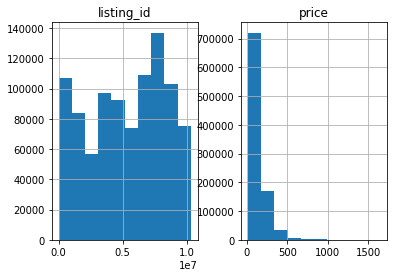

In [163]:
cal.hist();

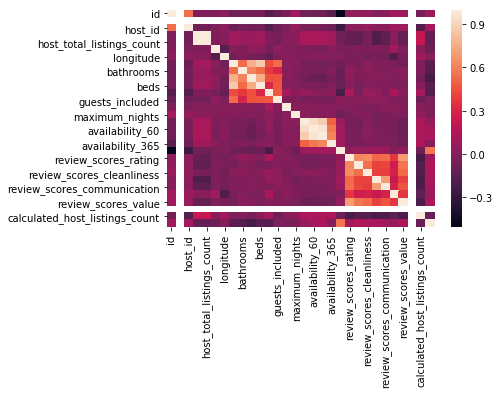

In [164]:
sns.heatmap(listings.corr());

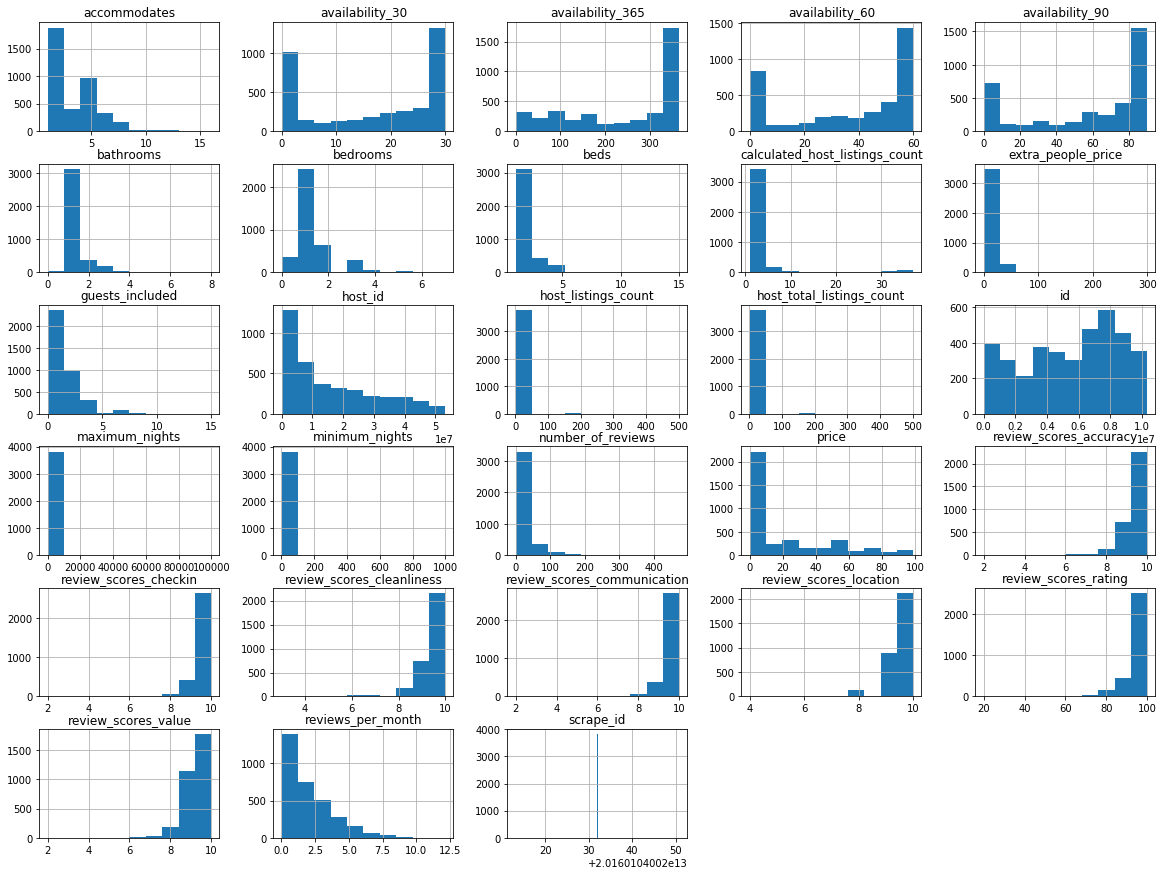

In [170]:
lis.hist(figsize = (20,15));

#### How does price of the house vary through out the year

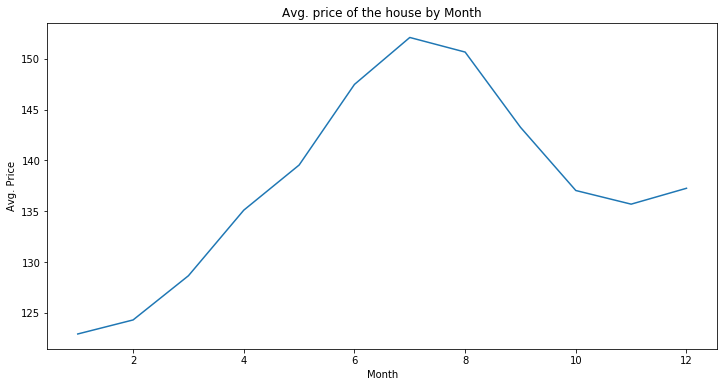

In [296]:
mon_avg_price = cal.groupby('mon')['price'].mean()

plt.figure(figsize=[12,6]);
plt.plot(mon_avg_price.index, mon_avg_price);
plt.xlabel('Month');
plt.ylabel('Avg. Price');
plt.title('Avg. price of the house by Month');
#plt.axes.set_xticks(np.arange(len(mon_avg_price)))

#### What is the most busiest time of the year?

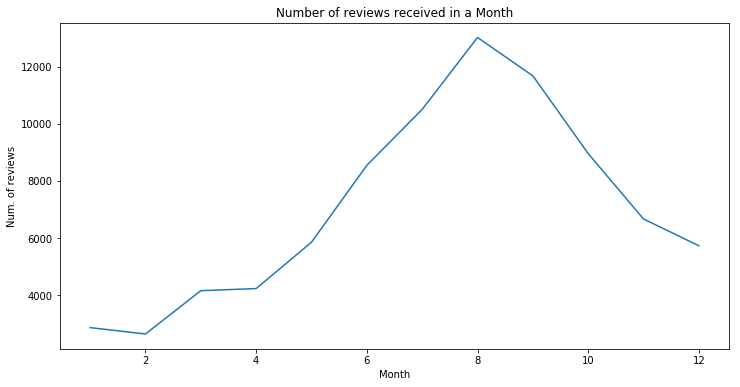

In [303]:
mon_reviews = rev.groupby('mon')['reviewer_id'].count()

plt.figure(figsize=[12,6]);
plt.plot(mon_reviews.index, mon_reviews);
plt.xlabel('Month');
plt.ylabel('Num. of reviews');
plt.title('Number of reviews received in a Month');
#plt.axes.set_xticks(np.arange(len(mon_avg_price)))

#### What are the main features that drives the house pricing?

In [309]:
lis.instant_bookable.unique()

array(['f', 't'], dtype=object)

In [307]:
lis.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,city,state,zipcode,city,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people_price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5.0,NaN,2,5.0,1,365,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",50.0,$40.00,1,0.0,2,90,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",75.0,$300.00,10,25.0,4,30,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",0.0,NaN,1,0.0,1,1125,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",50.0,$125.00,6,15.0,1,1125,t,30,60,90,365,2016-01-04,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
# Extract year : host_since and calculate feature with current year - host_since_year
# dummy variables: host_response_time, property_type, room_type, bed_type,cancellation_policy
# Remove % : 'host_response_rate','host_acceptance_rate'
# count values in: host_verifications, amenities
# Y/N: security_deposit, 
# Clean field: cleaning_fee

In [ ]:
# Define the features and target variable
X = lis[['host_since','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost', \
        'host_listings_count','host_verifications','host_has_profile_pic', 'host_has_profile_pic', \
        'host_identity_verified','zipcode','is_location_exact','property_type','room_type','accommodates' \
        'bathrooms','bedrooms','beds','bed_type','amenities','security_deposit','cleaning_fee','guests_included', \
        'extra_people_price','minimum_nights','maximum_nights','has_availability','number_of_reviews', \
        'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', \
        'review_scores_communication','review_scores_location','review_scores_value','requires_license', \
        'instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification', \
        'reviews_per_month']]
y = lis['price']


## Reference

https://stackoverflow.com/questions/35530640/pandas-use-value-if-not-null-else-use-value-from-next-column
https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work

https://www.quora.com/How-do-I-get-the-current-year-as-an-int-value-in-Python